# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a Kaggle competition on classifying dog breeds.

https://www.kaggle.com/c/dog-breed-identification

## Objectives

You will be able to:
* Independently design and build a CNN for image classifcation tasks
* Compare and apply multiple techniques for tuning a model including data augmentation and adapting pretrained models

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found here:

https://www.kaggle.com/c/dog-breed-identification/data

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

In [1]:
# No code persay, but download and decompress the data.

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [2]:
# Your code here; open the labels.csv file stored in the zip file
train_dir = 'data_org_subset/train'
val_dir = 'data_org_subset/val'
test_dir = 'data_org_subset/test'

In [4]:
ls data_org_subset/train/boston_bull/ | head -5

000bec180eb18c7604dcecc8fe0dba07.jpg
010d65bd29d246aea53d9849da142ccf.jpg
0755a940eac9a9b8cf0328b4be062096.jpg
07d7cfbdbd3682cae50902b53c798028.jpg
0b3d3120a62c2bc280f589d473041d06.jpg



In order to input the data into our standard pipeline, you'll need to organize the image files into a nested folder structure. At the top level will be a folder for the training data, a folder for the validation data, and a folder for the testing data. Within these top directory folders, you'll then need to create a folder for each of the categorical classes (in this case, dog breeds). Finally, within these category folders you'll then place each of the associated image files. To save time, do this for just 3 of the dog breeds such as 'boston_bull', 'toy_poodle', and 'scottish_deerhound'.

You're nested file structure should look like this:
* train
    * category1
    * category2
    * category3
    ...
* val
    * category1
    * category2
    * category3
    ...
* test 
    * category1
    * category2
    * category3
    ...  

> **Hint**: To do this, you can use the `os` module which will you to use execute many common bash commands straight from your python interpreter. For example, here's how you could make a new folder:
```python
import os
os.mkdir('New_Folder_Name')
```
Start by creating top level folders for the train, validation and test sets. Then, use your pandas dataframe to split the example images for each breed of dog into a 80% train set, and 10% validation and test sets. Use `os.path.join()` with the information from the dataframe to construct the relevant file path. With this, place the relevant images using the `shutil.copy()` into the appropriate directory. 

>> **Note**: It is worthwhile to try this exercise on your own, but you can also use the images stored under the `'data_org_subset/'` folder of this repository, in which the Kaggle dataset has already been subset and preprocessed.

In [10]:
# Your code here; transform the image files and then load them into Keras as tensors 
# (be sure to perform a train-val-test split)
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                batch_size=20,
                                                class_mode='categorical')
val_generator = test_gen.flow_from_directory(val_dir,
                                             target_size=(150,150),
                                             batch_size=20,
                                             class_mode='categorical')

Found 233 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [11]:
train_generator.class_indices

{'boston_bull': 0, 'scottish_deerhound': 1, 'toy_poodle': 2}

## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [12]:
# Create a baseline CNN model
from keras import models, layers, optimizers

model_base = models.Sequential()
model_base.add(layers.Conv2D(32, (3,3), activation='relu', 
                             input_shape=(150,150,3)))
model_base.add(layers.MaxPooling2D((2,2)))
model_base.add(layers.Conv2D(64, (3,3), activation='relu'))
model_base.add(layers.MaxPooling2D((2,2)))
model_base.add(layers.Flatten())
model_base.add(layers.Dense(64, activation='relu'))
model_base.add(layers.Dense(128, activation='relu'))
model_base.add(layers.Dense(3, activation='softmax'))

model_base.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                   loss='categorical_crossentropy',
                   metrics=['acc'])

history = model_base.fit_generator(train_generator,
                                   steps_per_epoch=100,
                                   epochs=10,
                                   validation_data=val_generator,
                                   validation_steps=50)

Epoch 1/10
100/100 [==============================] - 82s 816ms/step - loss: 0.8973 - acc: 0.5924 - val_loss: 0.8065 - val_acc: 0.6000
Epoch 2/10
100/100 [==============================] - 80s 800ms/step - loss: 0.4790 - acc: 0.8622 - val_loss: 0.7772 - val_acc: 0.6333
Epoch 3/10
100/100 [==============================] - 80s 805ms/step - loss: 0.2340 - acc: 0.9495 - val_loss: 0.8945 - val_acc: 0.5333
Epoch 4/10
100/100 [==============================] - 81s 808ms/step - loss: 0.1014 - acc: 0.9865 - val_loss: 0.9004 - val_acc: 0.6000
Epoch 5/10
100/100 [==============================] - 88s 882ms/step - loss: 0.0517 - acc: 0.9905 - val_loss: 1.0461 - val_acc: 0.5333
Epoch 6/10
100/100 [==============================] - 86s 864ms/step - loss: 0.0267 - acc: 0.9932 - val_loss: 1.1575 - val_acc: 0.5667
Epoch 7/10
100/100 [==============================] - 82s 822ms/step - loss: 0.0154 - acc: 0.9955 - val_loss: 3.0481 - val_acc: 0.3667
Epoch 8/10
100/100 [==============================] - 8

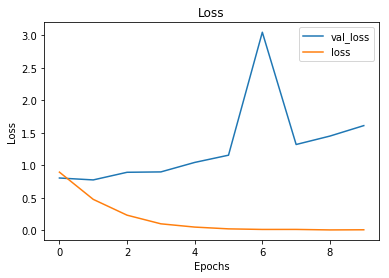

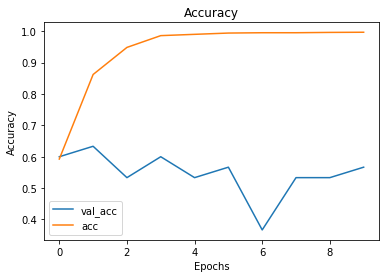

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
visualize_training_results(history)

In [15]:
test_generator = test_gen.flow_from_directory(test_dir,
                                              target_size=(150,150),
                                              batch_size=20,
                                              class_mode='categorical')
test_loss, test_acc = model_base.evaluate_generator(test_generator, steps=54)
y_hat_test = model_base.predict_generator(test_generator, steps=54)
print('{} predictions'.format(len(y_hat_test)))
print('Test accuracy:', test_acc)

Found 30 images belonging to 3 classes.
810 predictions
Test accuracy: 0.6999999972773187


## Loading a Pretrained CNN

## Feature Engineering with the Pre-trained Model

As you may well have guessed, adapting a pre-trained model will undoubtedly produce better results than a fresh CNN due to the limited size of training data. Import a pre-trained model such as VGG19 to use a convolutional base. Use this to transform the dataset into a rich feature space and add a few fully connected layers on top of the pre-trained layers to build a classification model. (Be sure to leave the pre-trained model frozen!)

In [19]:
# Your code here; add fully connected layers on top of the convolutional base
from keras.applications import VGG19

cnn_base = VGG19(weights='imagenet', include_top=False, 
                 input_shape=(240, 240, 3))

model_pre = models.Sequential()
model_pre.add(cnn_base)
model_pre.add(layers.Flatten())
model_pre.add(layers.Dense(64, activation='relu'))
model_pre.add(layers.Dense(128, activation='relu'))
model_pre.add(layers.Dense(3, activation='softmax'))

cnn_base.trainable = False

In [20]:
for layer in model_pre.layers:
    print(layer.name, layer.trainable)
print(len(model_pre.trainable_weights))
print(model_pre.summary())

vgg19 False
flatten_5 True
dense_13 True
dense_14 True
dense_15 True
6
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 387       
Total params: 21,638,787
Trainable params: 1,614,403
Non-trainable params: 20,024,384
_________________________________________________________________
None


In [22]:
# Create new image generators
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10

train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size=(240,240),
                                                batch_size=20,
                                                class_mode='categorical')

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir, 
        target_size=(240, 240), 
        batch_size = 20,
        class_mode= 'categorical')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(240, 240), 
        batch_size = 180,
        class_mode= 'categorical',
        shuffle=False)

test_images, test_labels = next(test_generator)

Found 233 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [23]:
model_pre.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [24]:
history_pre = model_pre.fit_generator(train_generator,
                                      steps_per_epoch=8,
                                      epochs=4,
                                      validation_data=val_generator,
                                      validation_steps=10)

Epoch 1/4
8/8 [==============================] - 256s 32s/step - loss: 1.0640 - acc: 0.4421 - val_loss: 1.3138 - val_acc: 0.2667
Epoch 2/4
8/8 [==============================] - 247s 31s/step - loss: 1.0026 - acc: 0.4765 - val_loss: 0.8861 - val_acc: 0.6333
Epoch 3/4
8/8 [==============================] - 250s 31s/step - loss: 0.8807 - acc: 0.6313 - val_loss: 0.8443 - val_acc: 0.5000
Epoch 4/4
8/8 [==============================] - 230s 29s/step - loss: 0.8463 - acc: 0.6111 - val_loss: 0.7210 - val_acc: 0.6667


## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

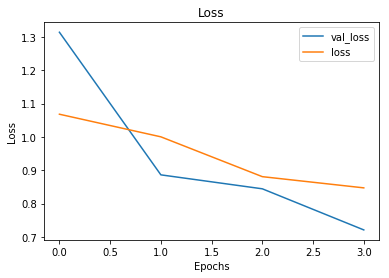

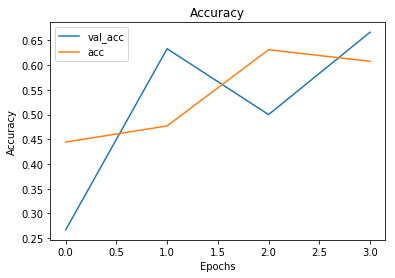

In [25]:
# Your code here; visualize the training / validation history associated with fitting the model.
visualize_training_results(history_pre)

## Final Model Evaluation

Now that you've trained and validated the model, perform a final evaluation of the model on the test set.

In [27]:
test_loss, test_acc = model_pre.evaluate_generator(test_generator, steps=5)
print('Test accuracy:', test_acc)

Test accuracy: 0.5666666626930237


## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.